In [16]:
'''
Build simple text classification model using a logistic classifier to determine sentiment of 
reviews on baby products and to help identify positive and negative review similarities, and
probability of positive given the review text
'''

%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

# Grab data and see first 5 rows
products = pd.read_csv(r'../data/amazon_baby.csv')
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [2]:
print('Total number of reviews:', len(products))

Total number of reviews: 183531


In [3]:
# Find average rating of top 10 most reviewd products
cols = ['name', 'rating']

avg_review = products[cols].groupby('name').agg({'rating': [np.size, np.mean]})
avg_review.sort_values([('rating','size')], ascending= False)[:10]

rating          
                                                     size      mean
name                                                               
Vulli Sophie the Giraffe Teether                      785  4.294268
Simple Wishes Hands-Free Breastpump Bra, Pink, ...    562  4.693950
Infant Optics DXR-5 2.4 GHz Digital Video Baby ...    561  3.843137
Baby Einstein Take Along Tunes                        547  4.712980
Cloud b Twilight Constellation Night Light, Turtle    520  4.538462
Fisher-Price Booster Seat, Blue/Green/Gray            489  4.715746
Fisher-Price Rainforest Jumperoo                      450  4.697778
Graco Nautilus 3-in-1 Car Seat, Matrix                419  4.272076
Leachco Snoogle Total Body Pillow                     388  4.414948
Regalo Easy Step Walk Thru Gate, White                374  4.203209

In [4]:
print('Number of products:', len(avg_review))

Number of products: 32417


In [5]:
# Experiment with adding a calculated test column

products['testCol'] = products[('rating')] + 1
products.head()

,name,review,rating,testCol
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,4
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,6
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,6
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,6
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,6


In [6]:
# Remove (drop) test column

products = products.drop('testCol', axis= 1)
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [7]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 
                  'bad', 'terrible', 'awful', 'wow', 'hate']

In [8]:
# Create function to count occurance of each word in review
def word_count(x):
    '''
    Takes input, x, converts it to a string, and returns dictionary of the count of each word.
    
    input:
    x = 'apples are apples'
    
    output:
    {'apples': 2, 'are': 1}

    '''
    test_review = str(x).split()
    word_count = dict(Counter(test_review))
    return word_count

# Create new column, apply word count function to all reviews, and place output in new column
products['word_count'] = products['review'].apply(word_count)

In [10]:
products.head(20)

,name,review,rating,word_count
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,"{'but': 1, 'Fab': 1, 'larger,': 1, 'my': 1, 'w..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'was': 1, 'holder.': 1, 'i': 1, 'came': 1, 'i..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'perfectly...would': 1, 'of': 1, 'bed': 1, 'l..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'binky.': 2, 'purchase.': 1, 'chart': 1, 'it'..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'allow': 1, 'It': 1, 'going': 1, 'their': 2, ..."
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'happens': 1, 'parent': 1, 'came': 1, 'made':..."
6,A Tale of Baby\'s Days with Peter Rabbit,"Lovely book, it\'s bound tightly so you may no...",4,"{'it\'s': 1, 'add': 1, 'around': 1, 'it': 1, '..."
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5,"{'ask': 1, 'when': 1, 'were': 1, 'first': 1, '..."
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5,"{'A': 1, 'It': 1, 'pinned': 1, 'parent,': 1, '..."
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,"{'Would': 1, 'pre-printed': 1, 'when': 2, 'the..."


In [11]:
#products.to_csv(r'../data/products_word_vector.csv')

(array([  3.21720000e+04,   1.83000000e+02,   4.20000000e+01,
          9.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([   1. ,   79.4,  157.8,  236.2,  314.6,  393. ,  471.4,  549.8,
         628.2,  706.6,  785. ]),
 <a list of 10 Patch objects>)

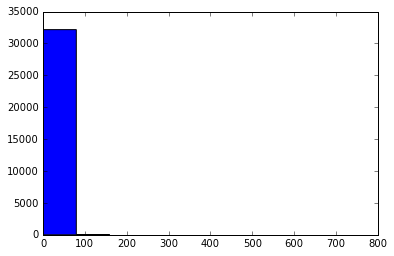

In [22]:
plt.hist(products['name'].value_counts())

In [58]:
name_counts = list(dict(products['name'].value_counts()))

n_counts_arr = np.asarray(name_counts)



TypeError: cannot perform reduce with flexible type

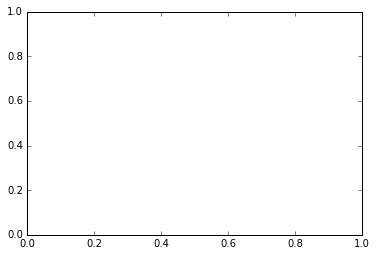

In [59]:
plt.hist(n_counts_arr)